<a href="https://colab.research.google.com/github/Aniketyadav00978/Unsupervised-Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRIP: The Sparks Foundation**
#Data Science and Business Analytics
##Name- Aniket Yadav
###Task 2: Prediction using Unsupervised Learning

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
df.shape

(150, 6)

In [54]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##Scatter Plot of Data

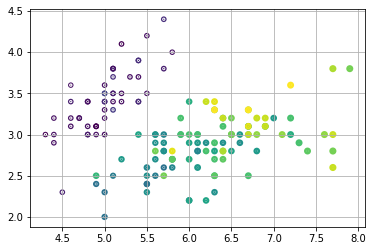

In [56]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],df['PetalLengthCm'],df['PetalWidthCm'],linewidths=4.5)
plt.grid()
plt.show()

##Finding Optimal value for Clustering

In [67]:
#Making Cluster 1 t0 10 and get the sum of Euclidean distance from the center of that cluster.
S=[]
for i in range(1,10):
  km=KMeans(n_clusters=i)
  km.fit(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
  S.append(km.inertia_)
S

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.517658942364825,
 30.210729828799053,
 28.056776096428912]

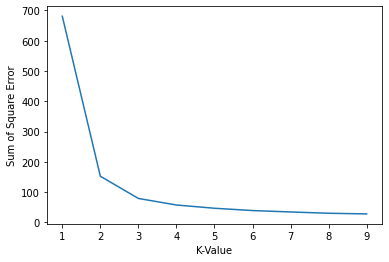

In [58]:
plt.plot(range(1,10),S)
plt.xlabel('K-Value')
plt.ylabel('Sum of Square Error')
plt.show()

In [66]:
#By seeing at this Elbow Graph we can conclude that after 3 K-values its Sum of Square Error is not much changing.
#So we consider 3 as optimum no. of clusters.
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
Predicted_y=km.fit_predict(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
Predicted_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [61]:
#Add a column Cluster in the main data
df['Cluster']=Predicted_y
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


In [62]:
df.shape

(150, 7)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Cluster        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [64]:
km.cluster_centers_
#We have three Clusters so we will get three centers.

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

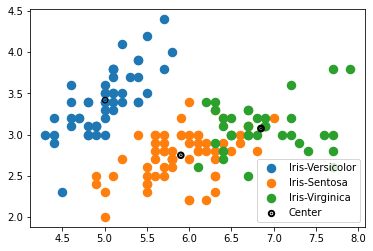

In [65]:
class_1=df[df.Cluster==0]   #ASSIGNING THE CLUSTER=0 VALUE TO THE VARIABLE
class_2=df[df.Cluster==1]   #ASSIGNING THE CLUSTER=1 VALUE TO THE VARIABLE
class_3=df[df.Cluster==2]   #ASSIGNING THE CLUSTER=2 VALUE TO THE VARIABLE
plt.scatter(class_1['SepalLengthCm'],class_1['SepalWidthCm'],linewidths=3.5,label='Iris-Versicolor')
plt.scatter(class_2['SepalLengthCm'],class_2['SepalWidthCm'],linewidths=3.5,label='Iris-Sentosa')
plt.scatter(class_3['SepalLengthCm'],class_3['SepalWidthCm'],linewidths=3.5,label='Iris-Virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],linewidth=5.5,color='Black',label='Center')
plt.legend(loc='best')
plt.show()